<a href="https://colab.research.google.com/github/NosenkoArtem/MADMO/blob/master/%D0%9F%D1%83%D1%82%D1%8C_%D0%B2%D0%BE%D0%B8%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Путь воина

In [0]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

### Генерация данных

С помощью функции sklearn.dataset.make_blobs сгенерируйте двумерные данные для бинарной классификации.

In [0]:
X, y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=[4,3])


Изобразите их на графике, пометив разные классы разными цветами. Вам понадобятся:
* plt.plot(..., c='...', label='...')
* plt.xlabel()
* plt.ylabel()
* plt.title()
* plt.legend()
* plt.show()


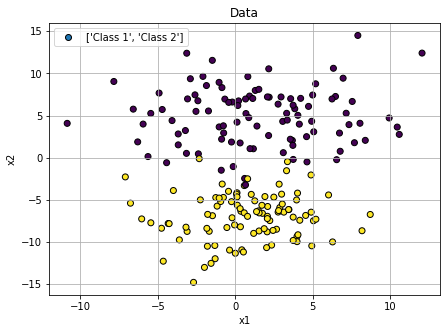

In [0]:
plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=y, label=['Class 1', 'Class 2'], edgecolors='black');
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.title('Data')
plt.legend(loc="best");


Разбейте выборку на трейн и тест датасеты, вам понадобится фукнция train_test_split.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Обучение

Импортируйте ваш любимый классификатор и создайте его экземпляр. Какие его параметры и как могут влиять на качество предсказания?

In [0]:
clf = knn()

Обучим наш классификатор с различными значениями гиперпараметров.

In [0]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': range(1,100,2),
    'p': range(1,10)
}

gs = GridSearchCV(clf, params, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': range(1, 100, 2), 'p': range(1, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
best_clf = gs.best_estimator_ 

Визуализируйте результаты лучшего классификатора.

In [0]:
def get_grid(data, border=1., step=.01):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step),
                       np.arange(y_min, y_max, step))

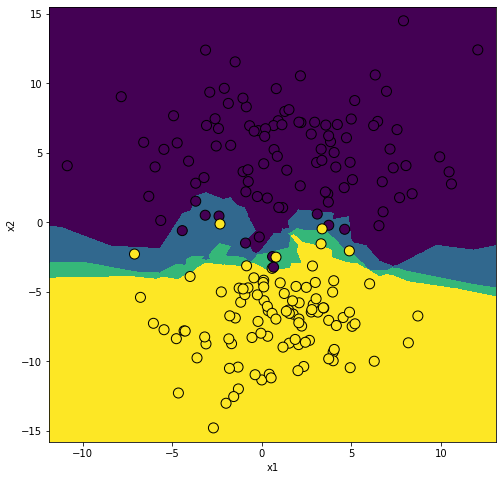

In [0]:
plt.figure(figsize=(8, 8))
xx, yy = get_grid(X)
predicted = best_clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='black')
plt.xlabel('x1')
plt.ylabel('x2');

### Улучшение пайплайна

Попробуйте отшкалировать признаки с помощью sklearn.preprocessing.StandardScaler

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Примените метод снижения размерности, например, sklearn.pca

In [0]:
pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train_transform = pca.fit_transform(X_train)
X_test_transform = pca.transform(X_test)

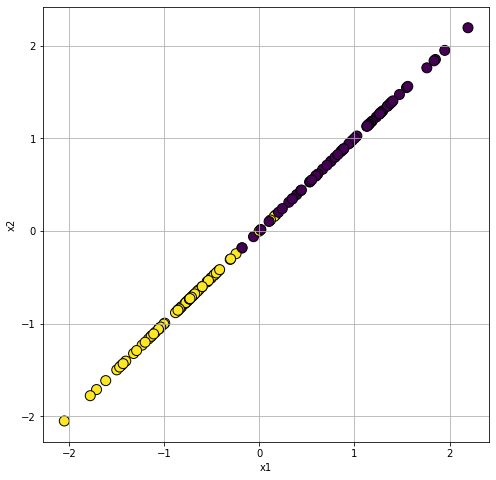

In [0]:
plt.figure(figsize=(8, 8))
plt.scatter(X_train_transform[:,0], X_train_transform[:,0], c=y_train, s=100, edgecolors='black')
plt.xlabel('x1')
plt.grid()
plt.ylabel('x2');

Повторно запустите обучение с grid search

In [0]:
params = {
    'n_neighbors': range(1,100,2),
    'p': range(1,10)
}

gs = GridSearchCV(clf, params, cv=5, n_jobs=-1)
gs.fit(X_train_transform, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': range(1, 100, 2), 'p': range(1, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
gs.best_score_

0.9714285714285714